Import the python packages

In [61]:
import time
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from IPython.display import display, clear_output
from dataset import AdverCityDataset

In [62]:
plt.rcParams['figure.dpi'] = 150

Define the path to the desired scenario.

In [63]:
root = r'/Users/moezrashed/Documents/Programming/Python/QUARRG/unj_hrd_d'

In [64]:
import os
print(os.path.isdir(root))

True


Create an instance of the AdverCityDataset class.

In [65]:
dataset = AdverCityDataset(root=root, car=0, cam=0)

We can use the class as an iterator. In the example below, we animate the images using a `for-loop`.

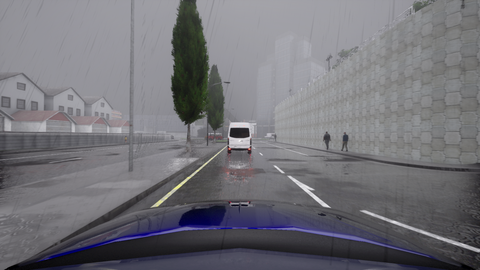

In [66]:
for car_pos, cam_ext, cam_ref, cam_intrinsics, cam_image in dataset:
    # Define the scaling factor
    scale_factor = 0.25  

    # Calculate the new size
    new_size = (int(cam_image.width * scale_factor), int(cam_image.height * scale_factor))

    # Resize the image
    scaled_image = cam_image.resize(new_size, Image.LANCZOS)

    # Display image
    display(scaled_image)
    time.sleep(0.01)
    clear_output(wait=True)

We can use different data as well. For example, we can get the ground truth position and attitude of the car.

In [67]:
all_data = []

Let's get the information car `0`.

In [68]:
dataset = AdverCityDataset(root=root, car=0, cam=0)
data = []
for _,_,cam_ref, cam_intrinsics, cam_image in dataset:
    data.append(cam_ref)
all_data.append(data)

Let's do the same for the remaining cars available in each scenario of this dataset.

In [69]:
dataset = AdverCityDataset(root=root, car=1, cam=0)
data = []
for _,_,cam_ref, cam_intrinsics, cam_image in dataset:
    data.append(cam_ref)
all_data.append(data)

In [70]:
dataset = AdverCityDataset(root=root, car=2, cam=0)
data = []
for _,_,cam_ref, cam_intrinsics, cam_image in dataset:
    data.append(cam_ref)
all_data.append(data)

In [59]:
print(cam_ref)

[-21.51348304748535, 134.4562530517578, 1.4837658405303955, 3.1126207886700286e-06, -1.271820068359375, -0.010989774018526077, 0.0]


We can now prepare some nice plots. Let's start by checking the ground truth trajectory of each car.

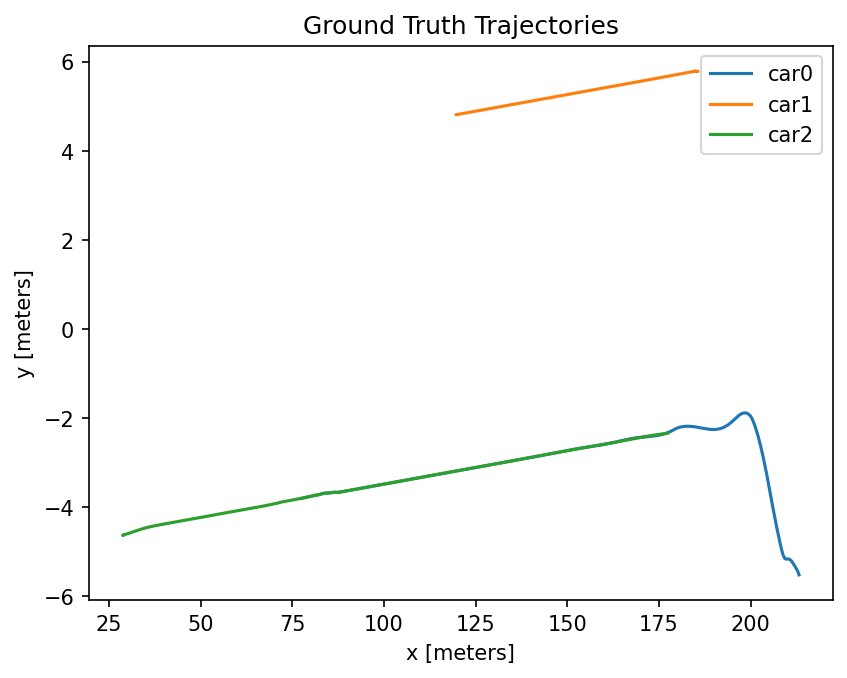

In [71]:
fig, axis = plt.subplots()

for car_data in all_data:
    # Let's convert the data to a numpy array to facilitate the access
    array = np.array(car_data)

    # Plot the trajectory. The data is a list which columns follow this order: x, y, z, roll, pitch, yaw, speed
    axis.plot(array[:, 0], array[:, 1])

axis.legend(['car0', 'car1', 'car2'])
axis.set_xlabel('x [meters]')
axis.set_ylabel('y [meters]')
axis.set_title('Ground Truth Trajectories')
plt.show()